# Data analysis MovieLens datasets

## Movielens-100K

In [47]:
import pandas as pd
import os
# Define the file path
file_path = os.path.join("Movielens-100K",'u.data')

# Read the file into a DataFrame, specifying the delimiter and column names
df = pd.read_csv(file_path, sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


/var/folders/mb/0bsbr7w531l12xlyj909d0840000gn/T/ipykernel_95034/3453879535.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['genre total']= genre_df.sum(axis=1)


<Axes: ylabel='Frequency'>

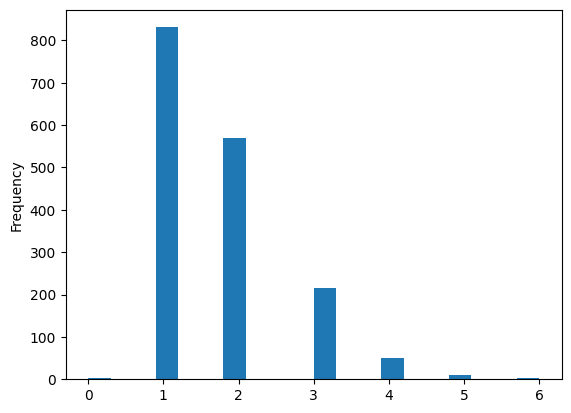

In [43]:
import pandas as pd

# Assuming your existing DataFrame is named df and the file path for "u.item" is defined
u_item_file_path = os.path.join("Movielens-100K",'u.item')
# Read the "u.item" file
# Note: You might need to adjust the encoding and separator based on the actual format of your file
movies_df = pd.read_csv(u_item_file_path, sep='|', encoding='ISO-8859-1', header=None, 
                        names=['movie_id', 'title', 'release_date', 'video_release_date', 
                               'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                               'Thriller', 'War', 'Western'])

# Merge the existing DataFrame with the movies DataFrame on the movie_id/item_id
merged_df = pd.merge(df, movies_df, left_on='item_id', right_on='movie_id')

# Display the first few rows to verify the merge
movie_df = merged_df[['user_id', 'item_id', 'rating', 'Action', 'Adventure', 'Animation', 
                               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                               'Thriller', 'War', 'Western']]

# movie_df[movie_df["item_id"]==131]
genre_df = movies_df[['Action', 'Adventure', 'Animation', 
                               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                               'Thriller', 'War', 'Western']]

genre_df['genre total']= genre_df.sum(axis=1)
genre_df["genre total"].plot.hist(bins=20)

### Normalizing the vectors using euclidean norm

In [20]:
import numpy as np

# Define an example vector
vector = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# Calculate the Euclidean norm (magnitude) of the vector
norm = np.linalg.norm(vector)
print(norm)
# Normalize the vector
normalized_vector = vector / norm
normalized_vector, norm

np.linalg.norm(normalized_vector)


1.7320508075688772


1.0

## MovieLens-1M

In [52]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(os.path.join("MovieLens-1M","users.dat"), sep='::',
 header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join("MovieLens-1M","ratings.dat"), sep='::',
 header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(os.path.join("MovieLens-1M","movies.dat"), sep='::',
 header=None, names=mnames, engine='python', encoding='latin-1')

movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# Split the 'genres' column into a list of genres
genres = df['genres'].str.split('|', expand=True)

# Use pd.get_dummies to one hot encode the genres
# Then use sum to combine duplicate columns (if any exist due to the splitting in the previous step)
one_hot_genres = pd.get_dummies(genres.apply(pd.Series).stack()).sum(level=0)

# Join the one hot encoded DataFrame with the original DataFrame
df_with_one_hot = df.join(one_hot_genres)

df_with_one_hot.head()  # Show only the first 5 rows for brevity

In [55]:
# movie_df[movie_df["item_id"]==131]
genre_df = movies[['Action', 'Adventure', 'Animation', 
                               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                               'Thriller', 'War', 'Western']]

genre_df['genre total']= genre_df.sum(axis=1)
genre_df["genre total"].plot.hist(bins=20)

KeyError: "None of [Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',\n       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',\n       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],\n      dtype='object')] are in the [columns]"